In [1]:
#version check
import sklearn
import numpy
import pandas
import xgboost
import mlxtend

print("sklearn version:",sklearn.__version__)
print("numpy version:", numpy.__version__)
print("pandas version:", pandas.__version__)
print("xgboost version:", xgboost.__version__)
print("mlxtend version:", mlxtend.__version__)
!python --version


sklearn version: 0.22.2.post1
numpy version: 1.19.5
pandas version: 1.1.5
xgboost version: 0.90
mlxtend version: 0.14.0
Python 3.7.10


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import os, sys
import urllib.request as urllib
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Dataset Exploration

In [3]:
#You do not have to download data, we requested it from the net.
url_dataset = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
par_data = urllib.urlopen(url_dataset)
with open('par_file.csv', 'wb') as file:
    file.write(par_data.read())

In [4]:
dataset=pd.read_csv('par_file.csv') #You can save this csv file, if you want to save.
dataset.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


Matrix column entries (attributes):
**name** - ASCII subject name and recording number
**MDVP:Fo(Hz)** - Average vocal fundamental frequency
**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency
**MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP** - Several measures of variation in fundamental frequency
**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude
**NHR,HNR** - Two measures of ratio of noise to tonal components in the voice
**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
**RPDE,D2** - Two nonlinear dynamical complexity measures
**DFA **- Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [5]:
dataset.shape

(195, 24)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
dataset.describe() #We could make elimination between features but we did not eliminate them. We used all of them. If the next programmer wants to use several columns, s/he can select the columns to be eliminated at this stage

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


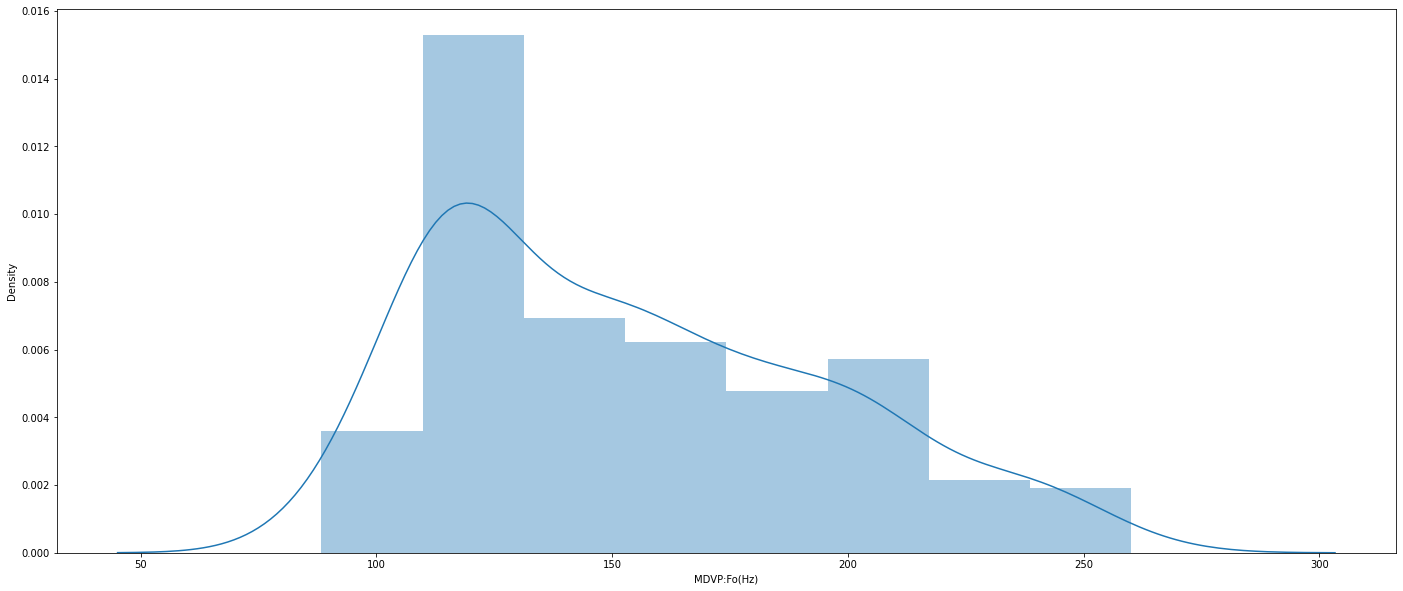

In [8]:
plt.figure(figsize=(24,10))
sb.set_color_codes(palette='bright')
sb.distplot(dataset["MDVP:Fo(Hz)"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


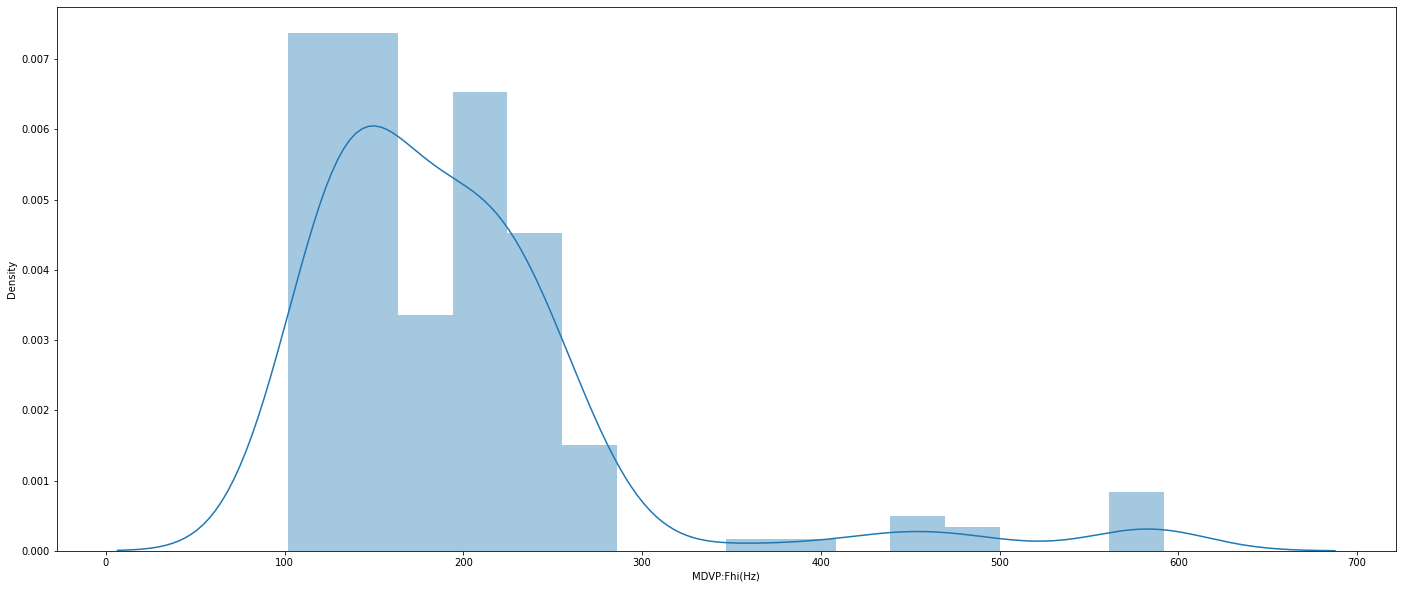

In [9]:
plt.figure(figsize=(24,10))
sb.set_color_codes(palette='bright')
sb.distplot(dataset["MDVP:Fhi(Hz)"]) #Except that, displot() method also can be used, for future version of seaborn. But we thought that these look better.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


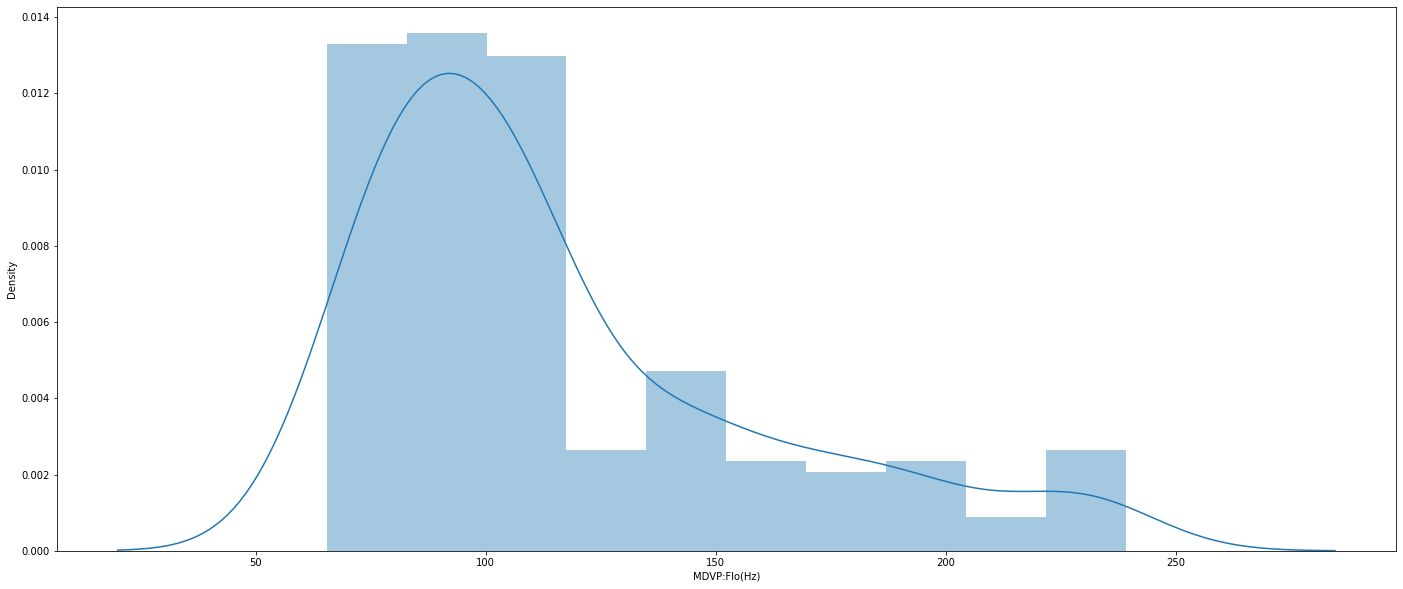

In [10]:
plt.figure(figsize=(24,10))
sb.set_color_codes(palette='dark')
sb.distplot(dataset["MDVP:Flo(Hz)"])

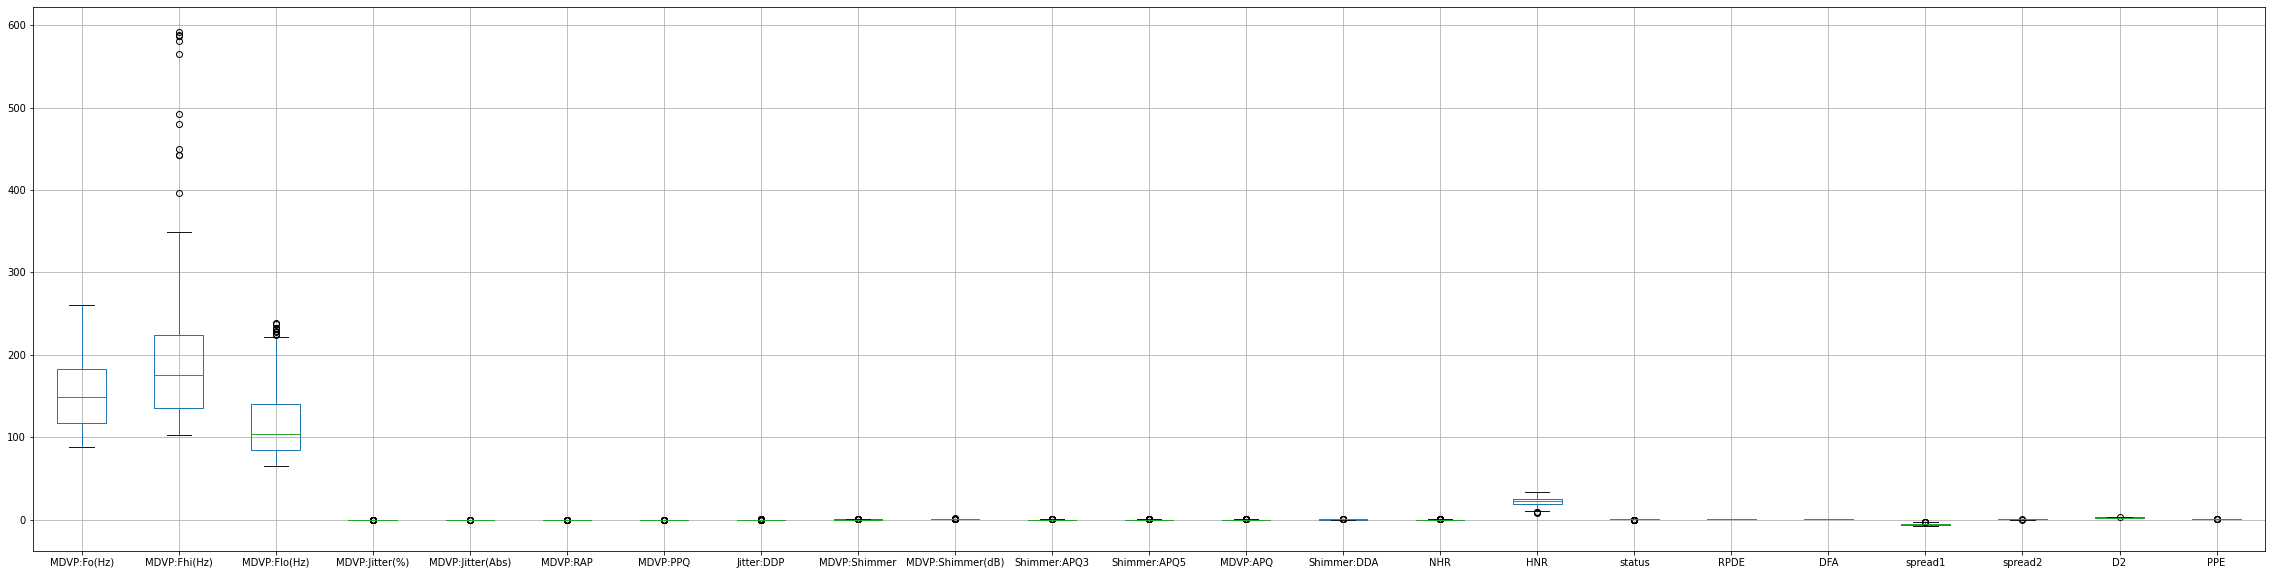

In [11]:
dataset.boxplot(figsize=(40,10))
plt.savefig('df_boxplot.jpg')

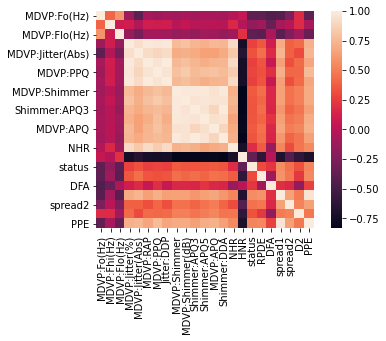

In [12]:
corr_map=dataset.corr()
sb.heatmap(corr_map,square=True, annot_kws={'size':24}) #detailed and complicated heatmap

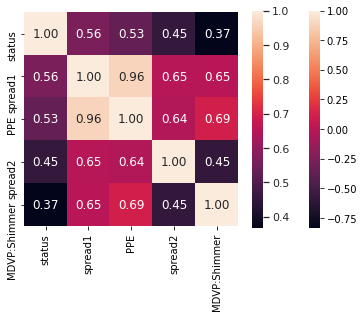

In [13]:

corr_map=dataset.corr()    #We've highlighted the 'status' column as we can guess with it.
sb.heatmap(corr_map,square=True)
heat_val=5
columns=corr_map.nlargest(heat_val,'status')['status'].index
coff_val=np.corrcoef(dataset[columns].values.T)
sb.set(font_scale=1)
sb.heatmap(coff_val,cbar=True,annot=True,square=True,fmt='.2f', annot_kws={'size': 12},yticklabels=columns.values,xticklabels=columns.values)
plt.savefig('basic_heatmap.jpg')
plt.show()


In [14]:
#correlation cofficient values for every column in the dataset
corr_vals=dataset.corr()['status']
corr_vals.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

In [15]:
dataset['status'].tail(50) #Status column looks like this

145    1
146    1
147    1
148    1
149    1
150    1
151    1
152    1
153    1
154    1
155    1
156    1
157    1
158    1
159    1
160    1
161    1
162    1
163    1
164    1
165    0
166    0
167    0
168    0
169    0
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    1
178    1
179    1
180    1
181    1
182    1
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
Name: status, dtype: int64

# Feature Splitting

In [16]:
#getting features and labels for classification and scaling part.
label=dataset.loc[:,'status'].values #As label we only used status column.
features=dataset.loc[:,dataset.columns!='status'].values[:,1:] #The others were used as features.


In [17]:
print(features)

[[119.992 157.302 74.997 ... 0.266482 2.3014419999999998 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.33263400000000004]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.6797720000000003
  0.13172799999999998]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]


In [18]:
#counting 1 and 0s in label
print("1s in status column:",label[label==1].shape[0])
print("0s in statust column:",label[label==0].shape[0])

1s in status column: 147
0s in statust column: 48


# Train-testset Splitting

In [19]:
train_x, test_x, train_y, test_y = train_test_split(features, label, test_size = 0.35, random_state = 42)

In [20]:
print('Train Features X Shape:', train_x.shape)
print('Train Label Y Shape:', train_y.shape)
print('Test Features X Shape:', test_x.shape)
print('Test Label Y Shape:', test_y.shape)


Train Features X Shape: (126, 22)
Train Label Y Shape: (126,)
Test Features X Shape: (69, 22)
Test Label Y Shape: (69,)


# PART 1 - Without Feature Scaling

In [21]:
class_models=[]
class_models.append(('Support Vector Machine - Without Feature Scaling', SVC()))
class_models.append(('Decision Tree - Without Feature Scaling', DecisionTreeClassifier(max_depth=1)))
class_models.append(('Logistic Regression - Without Feature Scaling', LogisticRegression()))

#For an understandable code, we packed all algorithms in a list

In [22]:
models=[]
predicted=[]
precision_scores=[]
f1_scores=[]
recall_scores=[]
scoring='accuracy'
for n,m in class_models:
    k_fold_val=KFold(n_splits=10,random_state=42)
    cross_val=cross_val_score(m,train_x, train_y,scoring=scoring,cv=k_fold_val)
    precision_s=cross_val=cross_val_score(m,train_x, train_y,scoring='precision',cv=k_fold_val)
    precision_scores.append(precision_s)
    recall_s=cross_val=cross_val_score(m,train_x, train_y,scoring='recall',cv=k_fold_val)
    recall_scores.append(recall_s)
    f1_s=cross_val=cross_val_score(m,train_x, train_y,scoring='f1',cv=k_fold_val)
    f1_scores.append(f1_s)
    predicted.append(cross_val)
    models.append(n)
    print("%s accuracy score: %f "%(n,cross_val.mean()))
    print("%s precision score: %f "%(n,precision_s.mean()))
    print("%s recall score: %f "%(n,recall_s.mean()))
    print("%s f1 score: %f "%(n,f1_s.mean()))

Support Vector Machine - Without Feature Scaling accuracy score: 0.873063 
Support Vector Machine - Without Feature Scaling precision score: 0.802552 
Support Vector Machine - Without Feature Scaling recall score: 0.970000 
Support Vector Machine - Without Feature Scaling f1 score: 0.873063 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree - Without Feature Scaling accuracy score: 0.857212 
Decision Tree - Without Feature Scaling precision score: 0.884881 
Decision Tree - Without Feature Scaling recall score: 0.842457 
Decision Tree - Without Feature Scaling f1 score: 0.857212 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression - Without Feature Scaling accuracy score: 0.910582 
Logistic Regression - Without Feature Scaling precision score: 0.876263 
Logistic Regression - Without Feature Scaling recall score: 0.957778 
Logistic Regression - Without Feature Scaling f1 score: 0.910582 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


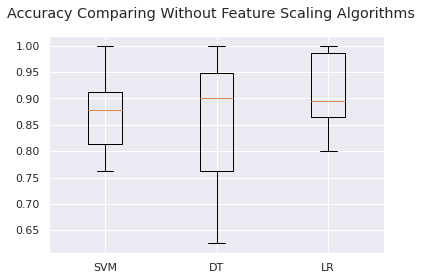

In [23]:
# Visualizing the Model accuracy
box=plt.figure()
box.suptitle("Accuracy Comparing Without Feature Scaling Algorithms")
plt.boxplot(predicted)
plt.xticks([1,2,3],['SVM','DT','LR'])
plt.savefig('without_feature_scaling_accuracy.jpg')
plt.show()


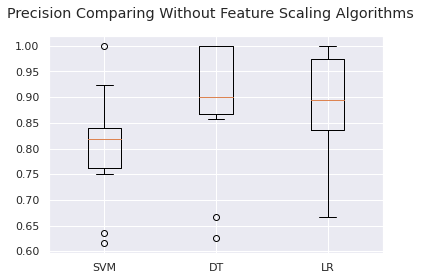

In [24]:
# Visualizing the Model precision
box=plt.figure()
box.suptitle("Precision Comparing Without Feature Scaling Algorithms")
plt.boxplot(precision_scores)
plt.xticks([1,2,3],['SVM','DT','LR'])
plt.savefig('without_feature_scaling_precision.jpg')
plt.show()

# Part 2 - With Feature Scaling

In this part, we used 2 different scaling method. These are min max scaler and standart scaler.

In [25]:
#We used pipeline for using scaler in appropriate way.
#For min max scaler Scaling between -1 and 1
ppline_min=[]
ppline_min.append(("Support Vector Machine With MinMax Feature Scaling",Pipeline([('Min Max Scaler', MinMaxScaler(feature_range=(-1,1))), ('Support Vector Machine', SVC())])))
ppline_min.append(("Decision Tree With MinMax Feature Scaling",Pipeline([('Min Max Scaler', MinMaxScaler(feature_range=(-1,1))), ('Deciison Tree', DecisionTreeClassifier())])))
ppline_min.append(("Logistic Regression With MinMax Feature Scaling",Pipeline([('Min Max Scaler', MinMaxScaler(feature_range=(-1,1))), ('Logistic Regression', LogisticRegression())])))

ppline_st=[]
ppline_st.append(("Support Vector Machine With Standard Feature Scaling",Pipeline([('Standard Scaler', StandardScaler()), ('Support Vector Machine', SVC())])))
ppline_st.append(("Decision Tree With Standard Feature Scaling",Pipeline([('Standard Scaler', StandardScaler()), ('Deciison Tree', DecisionTreeClassifier())])))
ppline_st.append(("Logistic Regression With Standard Feature Scaling",Pipeline([('Standard Scaler', StandardScaler()), ('Logistic Regression', LogisticRegression())])))

In [26]:
models_st=[]
predicted_st=[]
scoring='accuracy'
for n,m in ppline_st:
    k_fold_val=KFold(n_splits=10,random_state=42)
    cross_val=cross_val_score(m,train_x, train_y,scoring=scoring,cv=k_fold_val)
    cross_val_pre=cross_val_score(m,train_x, train_y,scoring='precision',cv=k_fold_val)
    f1=cross_val_score(m,train_x, train_y,scoring='f1',cv=k_fold_val)
    recall=cross_val_score(m,train_x, train_y,scoring='recall',cv=k_fold_val)
    predicted_st.append(cross_val)
    models_st.append(n)
    print("Accuracy %s : %f "%(n,cross_val.mean()))
    print('Precision %s : %f '% (n, np.mean(cross_val_pre)))
    print("Recall %s : %f "%(n,recall.mean()))
    print('F1-SCORE %s : %f '% (n, f1.mean()))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Support Vector Machine With Standard Feature Scaling : 0.856410 
Precision Support Vector Machine With Standard Feature Scaling : 0.842273 
Recall Support Vector Machine With Standard Feature Scaling : 1.000000 
F1-SCORE Support Vector Machine With Standard Feature Scaling : 0.909985 
Accuracy Decision Tree With Standard Feature Scaling : 0.834615 
Precision Decision Tree With Standard Feature Scaling : 0.860631 
Recall Decision Tree With Standard Feature Scaling : 0.863846 
F1-SCORE Decision Tree With Standard Feature Scaling : 0.884846 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Logistic Regression With Standard Feature Scaling : 0.857692 
Precision Logistic Regression With Standard Feature Scaling : 0.890833 
Recall Logistic Regression With Standard Feature Scaling : 0.929242 
F1-SCORE Logistic Regression With Standard Feature Scaling : 0.904369 


In [27]:
models_min=[]
predicted_min=[]
scoring='accuracy'
for n,m in ppline_st:
    k_fold_val=KFold(n_splits=10,random_state=42)
    cross_val=cross_val_score(m,train_x, train_y,scoring=scoring,cv=k_fold_val)
    cross_val_pre=cross_val_score(m,train_x, train_y,scoring='precision',cv=k_fold_val)
    f1=cross_val_score(m,train_x, train_y,scoring='f1',cv=k_fold_val)
    recall=cross_val_score(m,train_x, train_y,scoring='recall',cv=k_fold_val)
    predicted_min.append(cross_val)
    models_min.append(n)
    print("Accuracy %s : %f "%(n,cross_val.mean()))
    print('Precision %s : %f '% (n, np.mean(cross_val_pre)))
    print("Recall %s : %f "%(n,recall.mean()))
    print('F1-SCORE %s : %f '% (n, f1.mean()))

Accuracy Support Vector Machine With Standard Feature Scaling : 0.856410 
Precision Support Vector Machine With Standard Feature Scaling : 0.842273 
Recall Support Vector Machine With Standard Feature Scaling : 1.000000 
F1-SCORE Support Vector Machine With Standard Feature Scaling : 0.909985 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Decision Tree With Standard Feature Scaling : 0.841667 
Precision Decision Tree With Standard Feature Scaling : 0.859596 
Recall Decision Tree With Standard Feature Scaling : 0.924957 
F1-SCORE Decision Tree With Standard Feature Scaling : 0.863922 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Logistic Regression With Standard Feature Scaling : 0.857692 
Precision Logistic Regression With Standard Feature Scaling : 0.890833 
Recall Logistic Regression With Standard Feature Scaling : 0.929242 
F1-SCORE Logistic Regression With Standard Feature Scaling : 0.904369 


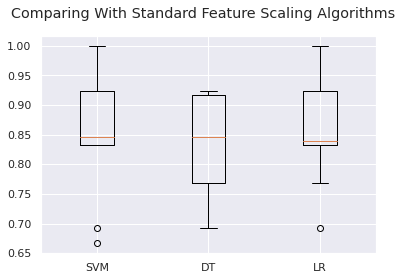

In [28]:
box=plt.figure()
box.suptitle("Comparing With Standard Feature Scaling Algorithms")


plt.boxplot(predicted_st)
plt.xticks([1,2,3],['SVM','DT','LR'])
plt.savefig('with_standard_feature_scaling.jpg')
plt.show()




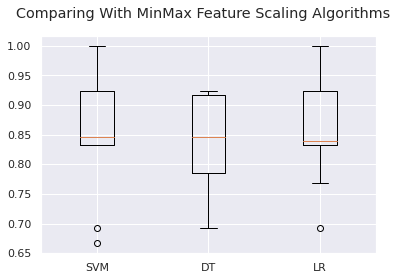

In [29]:
box=plt.figure()
box.suptitle("Comparing With MinMax Feature Scaling Algorithms")
plt.boxplot(predicted_min)
plt.xticks([1,2,3],['SVM','DT','LR'])
plt.savefig('with_minmax_feature_scaling.jpg')
plt.show()

## PART 2.1. - Algorithms with Bagging Classifier

In [30]:
"""
Normally, bagging classifier's implementation in a basic situation looks like this.
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(DecisionTreeClassifier(random_state=42))
model.fit(train_x, train_y)
model.score(test_x,test_y)
"""
from sklearn.ensemble import BaggingClassifier
ppline_st_bag=[]
ppline_st_bag.append(("Support Vector Machine With Standard Feature Scaling Bagging",Pipeline([('Standard Scaler', StandardScaler()), ('Support Vector Machine', BaggingClassifier(SVC()))])))
ppline_st_bag.append(("Decision Tree With Standard Feature Scaling Bagging",Pipeline([('Standard Scaler', StandardScaler()), ('Deciison Tree', BaggingClassifier(DecisionTreeClassifier(max_depth=1)))])))
ppline_st_bag.append(("Logistic Regression With Standard Feature Scaling Bagging",Pipeline([('Standard Scaler', StandardScaler()), ('Logistic Regression', BaggingClassifier(LogisticRegression()))])))

ppline_min_bag=[]
ppline_min_bag.append(("Support Vector Machine With MinMax Feature Scaling",Pipeline([('Min Max Scaler', MinMaxScaler(feature_range=(-1,1))), ('Support Vector Machine', BaggingClassifier(SVC()))])))
ppline_min_bag.append(("Decision Tree With MinMax Feature Scaling",Pipeline([('Min Max Scaler', MinMaxScaler(feature_range=(-1,1))), ('Deciison Tree', BaggingClassifier(DecisionTreeClassifier(max_depth=1)))])))
ppline_min_bag.append(("Logistic Regression With MinMax Feature Scaling",Pipeline([('Min Max Scaler', MinMaxScaler(feature_range=(-1,1))), ('Logistic Regression', BaggingClassifier(LogisticRegression()))])))


In [31]:
models_st_bag=[]
predicted_st_bag=[]
scoring='accuracy'
for n,m in ppline_st_bag:
    k_fold_val=KFold(n_splits=10,random_state=42)
    cross_val=cross_val_score(m,train_x, train_y,scoring=scoring,cv=k_fold_val)
    cross_val_pre=cross_val_score(m,train_x, train_y,scoring='precision',cv=k_fold_val)
    f1=cross_val_score(m,train_x, train_y,scoring='f1',cv=k_fold_val)
    recall=cross_val_score(m,train_x, train_y,scoring='recall',cv=k_fold_val)
    predicted_st_bag.append(cross_val)
    models_st_bag.append(n)
    
    
    print("Accuracy %s : %f "%(n,cross_val.mean()))
    print('Precision %s : %f '% (n, np.mean(cross_val_pre)))
    print("Recall %s : %f "%(n,recall.mean()))
    print('F1-SCORE %s : %f '% (n, f1.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Support Vector Machine With Standard Feature Scaling Bagging : 0.888462 
Precision Support Vector Machine With Standard Feature Scaling Bagging : 0.856818 
Recall Support Vector Machine With Standard Feature Scaling Bagging : 1.000000 
F1-SCORE Support Vector Machine With Standard Feature Scaling Bagging : 0.910575 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Decision Tree With Standard Feature Scaling Bagging : 0.817308 
Precision Decision Tree With Standard Feature Scaling Bagging : 0.822835 
Recall Decision Tree With Standard Feature Scaling Bagging : 0.915354 
F1-SCORE Decision Tree With Standard Feature Scaling Bagging : 0.881187 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Logistic Regression With Standard Feature Scaling Bagging : 0.864744 
Precision Logistic Regression With Standard Feature Scaling Bagging : 0.892222 
Recall Logistic Regression With Standard Feature Scaling Bagging : 0.936944 
F1-SCORE Logistic Regression With Standard Feature Scaling Bagging : 0.910905 


In [32]:
models_mm_bag=[]
predicted_mm_bag=[]
scoring='accuracy'
for n,m in ppline_min_bag:
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix
    k_fold_val=KFold(n_splits=10,random_state=42)
    cross_val_acc=cross_val_score(m,train_x, train_y,scoring=scoring,cv=k_fold_val)
    cross_val_pre=cross_val_score(m,train_x, train_y,scoring='precision',cv=k_fold_val)
    f1=cross_val_score(m,train_x, train_y,scoring='f1',cv=k_fold_val)
    recall=cross_val_score(m,train_x, train_y,scoring='recall',cv=k_fold_val)
    predicted_mm_bag.append(cross_val_acc)
    models_mm_bag.append(n)
   
    print("Accuracy %s : %f "%(n,cross_val_acc.mean()))
    print('Precision %s : %f '% (n, np.mean(cross_val_pre)))
    print("Recall %s : %f "%(n,recall.mean()))
    print('F1-SCORE %s : %f '% (n, f1.mean()))
    

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Support Vector Machine With MinMax Feature Scaling : 0.871795 
Precision Support Vector Machine With MinMax Feature Scaling : 0.842273 
Recall Support Vector Machine With MinMax Feature Scaling : 1.000000 
F1-SCORE Support Vector Machine With MinMax Feature Scaling : 0.909985 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Decision Tree With MinMax Feature Scaling : 0.817949 
Precision Decision Tree With MinMax Feature Scaling : 0.850563 
Recall Decision Tree With MinMax Feature Scaling : 0.913333 
F1-SCORE Decision Tree With MinMax Feature Scaling : 0.879401 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Logistic Regression With MinMax Feature Scaling : 0.856410 
Precision Logistic Regression With MinMax Feature Scaling : 0.859394 
Recall Logistic Regression With MinMax Feature Scaling : 0.959798 
F1-SCORE Logistic Regression With MinMax Feature Scaling : 0.897924 


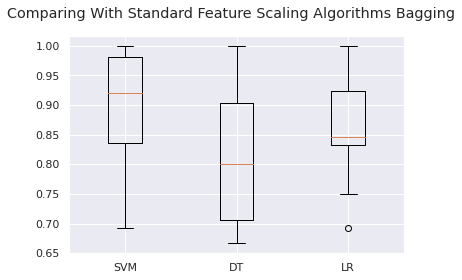

In [33]:
box=plt.figure()
box.suptitle("Comparing With Standard Feature Scaling Algorithms Bagging")
plt.boxplot(predicted_st_bag)
plt.xticks([1,2,3],['SVM','DT','LR'])
plt.savefig('with_standard_feature_scaling_bagging.jpg')
plt.show()


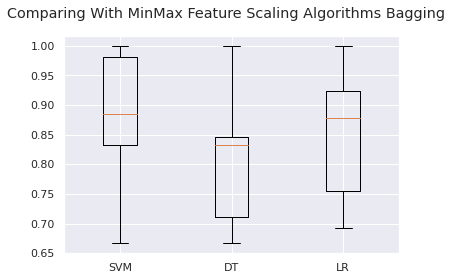

In [34]:
box=plt.figure()
box.suptitle("Comparing With MinMax Feature Scaling Algorithms Bagging")
plt.boxplot(predicted_mm_bag)
plt.xticks([1,2,3],['SVM','DT','LR'])
plt.savefig('with_minmax_feature_scaling_bagging.jpg')
plt.show()


# PART 3 - Ensemble and Boosting Algorithms

First of all  we used classifiers with default parameters, after this stage we moved on deep architecture of classifiers.

In [35]:
boostings=[]
boostings.append(('Random Forest Classifier With Min Max Scaler', Pipeline([("MinMax Scaler", MinMaxScaler(feature_range = (-1, 1))),("Random Forest",RandomForestClassifier())])))
boostings.append(('Ada Boost Classifier With Min Max Scaler', Pipeline([("MinMax Scaler", MinMaxScaler(feature_range = (-1, 1))),("Ada Boost",AdaBoostClassifier())])))
boostings.append(('XGBoost Classifier With Min Max Scaler', Pipeline([("MinMax Scaler", MinMaxScaler(feature_range = (-1, 1))),("XGBoost",XGBClassifier())])))

boostings_st=[]
boostings_st.append(('Random Forest Classifier With Standard Scaler', Pipeline([("Standard Scaler", StandardScaler()),("Random Forest",RandomForestClassifier())])))
boostings_st.append(('Ada Boost Classifier With Standard Scaler', Pipeline([("Standard Scaler", StandardScaler()),("Ada Boost",AdaBoostClassifier())])))
boostings_st.append(('XGBoost Classifier With Standard Scaler', Pipeline([("Standard Scaler", StandardScaler()),("XGBoost",XGBClassifier())])))

In [36]:

models_boost_st=[]
predicted_boost_st=[]
for n,m in boostings_st:
    k_fold_val=KFold(n_splits=10,random_state=42)
    accuracy=cross_val_score(m,train_x,train_y,cv=k_fold_val,scoring='accuracy')
    predicted_boost_st.append(accuracy)
    models_boost_st.append(n)
   
    cross_val_pre=cross_val_score(m,train_x, train_y,scoring='precision',cv=k_fold_val)
    f1=cross_val_score(m,train_x, train_y,scoring='f1',cv=k_fold_val)
    recall=cross_val_score(m,train_x, train_y,scoring='recall',cv=k_fold_val)
    
    
    
    print("Accuracy %s : %f "%(n,accuracy.mean()))
    print('Precision %s : %f '% (n, np.mean(cross_val_pre)))
    print("Recall %s : %f "%(n,recall.mean()))
    print('F1-SCORE %s : %f '% (n, f1.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Random Forest Classifier With Standard Scaler : 0.882051 
Precision Random Forest Classifier With Standard Scaler : 0.903763 
Recall Random Forest Classifier With Standard Scaler : 0.969444 
F1-SCORE Random Forest Classifier With Standard Scaler : 0.920625 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Ada Boost Classifier With Standard Scaler : 0.921795 
Precision Ada Boost Classifier With Standard Scaler : 0.932298 
Recall Ada Boost Classifier With Standard Scaler : 0.941667 
F1-SCORE Ada Boost Classifier With Standard Scaler : 0.934697 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy XGBoost Classifier With Standard Scaler : 0.897436 
Precision XGBoost Classifier With Standard Scaler : 0.913088 
Recall XGBoost Classifier With Standard Scaler : 0.944444 
F1-SCORE XGBoost Classifier With Standard Scaler : 0.926143 


In [37]:
models_boost_mm=[]
predicted_boost_mm=[]
for n,m in boostings:
    k_fold_val=KFold(n_splits=10,random_state=42)
    accuracy=cross_val_score(m,train_x,train_y,cv=k_fold_val,scoring='accuracy')
    predicted_boost_mm.append(accuracy)
    models_boost_mm.append(n)
   
    cross_val_pre=cross_val_score(m,train_x, train_y,scoring='precision',cv=k_fold_val)
    f1=cross_val_score(m,train_x, train_y,scoring='f1',cv=k_fold_val)
    recall=cross_val_score(m,train_x, train_y,scoring='recall',cv=k_fold_val)
    
    
    
    print("Accuracy %s : %f "%(n,accuracy.mean()))
    print('Precision %s : %f '% (n, np.mean(cross_val_pre)))
    print("Recall %s : %f "%(n,recall.mean()))
    print('F1-SCORE %s : %f '% (n, f1.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Random Forest Classifier With Min Max Scaler : 0.873718 
Precision Random Forest Classifier With Min Max Scaler : 0.872955 
Recall Random Forest Classifier With Min Max Scaler : 0.969444 
F1-SCORE Random Forest Classifier With Min Max Scaler : 0.920192 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy Ada Boost Classifier With Min Max Scaler : 0.914103 
Precision Ada Boost Classifier With Min Max Scaler : 0.932298 
Recall Ada Boost Classifier With Min Max Scaler : 0.952778 
F1-SCORE Ada Boost Classifier With Min Max Scaler : 0.934697 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy XGBoost Classifier With Min Max Scaler : 0.897436 
Precision XGBoost Classifier With Min Max Scaler : 0.913088 
Recall XGBoost Classifier With Min Max Scaler : 0.944444 
F1-SCORE XGBoost Classifier With Min Max Scaler : 0.926143 


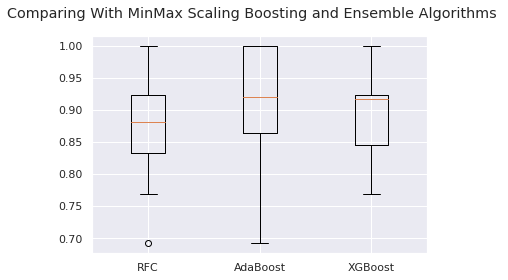

In [38]:
box=plt.figure()
box.suptitle("Comparing With MinMax Scaling Boosting and Ensemble Algorithms ")
plt.boxplot(predicted_boost_mm)
plt.xticks([1,2,3],['RFC','AdaBoost','XGBoost'])
plt.savefig('with_minmax_feature_scaling_ensemble.jpg')
plt.show()

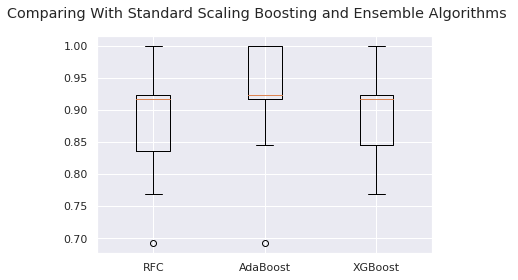

In [39]:
box=plt.figure()
box.suptitle("Comparing With Standard Scaling Boosting and Ensemble Algorithms ")
plt.boxplot(predicted_boost_st)
plt.xticks([1,2,3],['RFC','AdaBoost','XGBoost'])
plt.savefig('with_standard_feature_scaling_ensemble.jpg')
plt.show()

## Improving Boosting Algorithms

In [40]:
dtc=DecisionTreeClassifier(max_depth=1) #This is used for base estimator.
number_estimators = list(map(int, np.linspace(1,100,20)))
ada_dtc_mean = []
ada_dtc_std = []

prec_mean = []
prec_std = []

rec_mean = []
rec_std = []
for n in number_estimators:
    ada_dtc = AdaBoostClassifier(base_estimator=dtc, n_estimators=n)
    k_fold_val=KFold(n_splits=10,random_state=42)
    accuracy_score = cross_val_score(ada_dtc, train_x,train_y, cv=k_fold_val, scoring='accuracy')
    prec= cross_val_score(ada_dtc, train_x,train_y, cv=k_fold_val, scoring='precision')
    rec = cross_val_score(ada_dtc, train_x,train_y, cv=k_fold_val, scoring='recall')
    ada_dtc_mean.append(accuracy_score.mean())
    ada_dtc_std.append(accuracy_score.std())
    prec_mean.append(prec.mean())
    prec_std.append(prec.std())

    rec_mean.append(rec.mean())
    rec_std.append(rec.std())
    

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

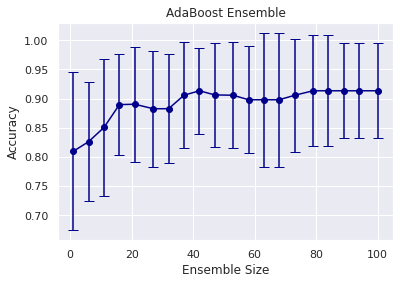

In [41]:
plt.figure()
(_, ada_graph, _) = plt.errorbar(number_estimators, ada_dtc_mean, yerr=ada_dtc_std, c='darkblue', fmt='-o', capsize=5)
for ada in ada_graph:
    ada.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()

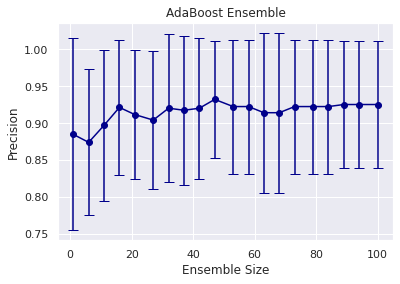

In [42]:
plt.figure()
(_, ada_graph, _) = plt.errorbar(number_estimators, prec_mean, yerr=prec_std, c='darkblue', fmt='-o', capsize=5)
for ada in ada_graph:
    ada.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Precision'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble')
plt.savefig('adaboost_precision_ensemble.jpg')
plt.show()

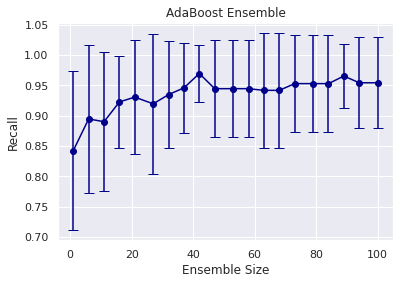

In [43]:
plt.figure()
(_, ada_graph, _) = plt.errorbar(number_estimators, rec_mean, yerr=rec_std, c='darkblue', fmt='-o', capsize=5)
for ada in ada_graph:
    ada.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Recall'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()

In [44]:
dtc=DecisionTreeClassifier(max_depth=1) #This is used for base estimator.
number_estimators = list(map(int, np.linspace(1,100,20)))
xgb_dtc_mean = []
xgb_dtc_std = []
precx_mean = []
precx_std = []

for n in number_estimators:
    xgb_dtc = XGBClassifier(base_estimator=dtc, n_estimators=n)
    k_fold_val=KFold(n_splits=10,random_state=42)
    accuracy_score = cross_val_score(xgb_dtc, train_x,train_y, cv=k_fold_val, scoring='accuracy')
    prec= cross_val_score(xgb_dtc, train_x,train_y, cv=k_fold_val, scoring='precision')
    xgb_dtc_mean.append(accuracy_score.mean())
    xgb_dtc_std.append(accuracy_score.std())
    precx_mean.append(prec.mean())
    precx_std.append(prec.std())
    

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


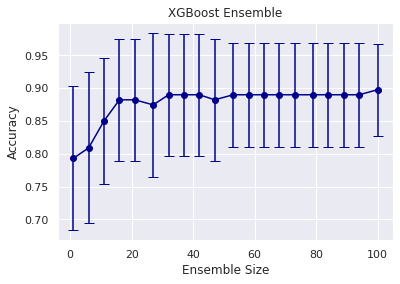

In [45]:
plt.figure()
(_, xgb_graph, _) = plt.errorbar(number_estimators, xgb_dtc_mean, yerr=xgb_dtc_std, c='darkblue', fmt='-o', capsize=5)
for xgb in xgb_graph:
    xgb.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('XGBoost Ensemble');
plt.show()

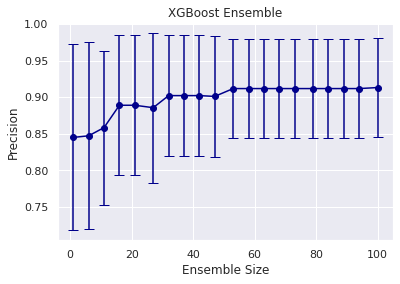

In [46]:
plt.figure()
(_, xgb_graph, _) = plt.errorbar(number_estimators, precx_mean, yerr=precx_std, c='darkblue', fmt='-o', capsize=5)
for xgb in xgb_graph:
    xgb.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Precision'); plt.xlabel('Ensemble Size'); plt.title('XGBoost Ensemble')
plt.savefig('xgbboost_precision_ensemble.jpg')
plt.show()

## Stacking Classifier

At this part, we stacked different machine learning algorithms for improving results. For different meta classifiers results were sometimes bad.

In [47]:
#First try is with random forest, decision tree, support vector machine and logistic regression as meta classifier.
rfc=RandomForestClassifier(random_state=0)
dtc=DecisionTreeClassifier(max_depth=1) #For improving part, we used same parameters with dtc.
svm=SVC()
lr=LogisticRegression()
stack=StackingClassifier(classifiers=[rfc,dtc,svm],meta_classifier=lr)
cl_labels=['Random Forest','Decision Tree','Support Vector Machine','Stacking Classifier']
classify=[rfc,dtc,svm,stack]
stack_mean = []
stack_std = []
precision_mean = []  #We wanted to take scores for accuracy, precision and recall.
precision_std=[]
recall_mean=[]
recall_std=[]

for clf, name in zip(classify, cl_labels):
    k_fold_val=KFold(n_splits=10,random_state=42)   
    accuracy_score = cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='accuracy')
    prec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='precision')
    rec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='recall')
    
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(accuracy_score.mean(), accuracy_score.std(), name))
    print ("Precision: %.2f (+/- %.2f) [%s]" %(prec.mean(), prec.std(), name))
    print ("Recall: %.2f (+/- %.2f) [%s]" %(rec.mean(), rec.std(), name))

    stack_mean.append(accuracy_score.mean())
    stack_std.append(accuracy_score.std())
    precision_mean.append(prec.mean())
    precision_std.append(prec.std())
    recall_mean.append(rec.mean())
    recall_std.append(rec.std())
    clf.fit(train_x, train_y)
    

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 0.89 (+/- 0.08) [Random Forest]
Precision: 0.90 (+/- 0.09) [Random Forest]
Recall: 0.96 (+/- 0.07) [Random Forest]
Accuracy: 0.81 (+/- 0.14) [Decision Tree]
Precision: 0.88 (+/- 0.13) [Decision Tree]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



Recall: 0.84 (+/- 0.13) [Decision Tree]
Accuracy: 0.79 (+/- 0.12) [Support Vector Machine]
Precision: 0.80 (+/- 0.11) [Support Vector Machine]
Recall: 0.97 (+/- 0.06) [Support Vector Machine]
Accuracy: 0.89 (+/- 0.08) [Stacking Classifier]
Precision: 0.90 (+/- 0.09) [Stacking Classifier]
Recall: 0.96 (+/- 0.07) [Stacking Classifier]


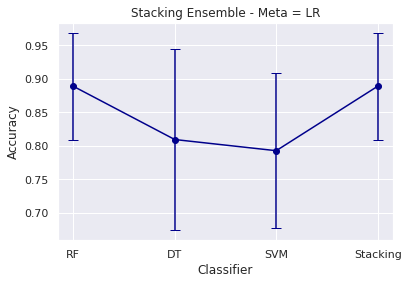

In [48]:
plt.figure()
(_, lr_meta, _) = plt.errorbar(range(4), stack_mean, yerr=stack_std, c='DARKblue', fmt='-o', capsize=5)
for l_met in lr_meta:
    l_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'DT', 'SVM', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = LR');
plt.show()

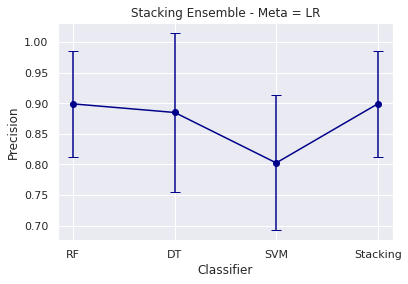

In [49]:
plt.figure()
(_, lr_meta, _) = plt.errorbar(range(4), precision_mean, yerr=precision_std, c='DARKblue', fmt='-o', capsize=5)
for l_met in lr_meta:
    l_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'DT', 'SVM', 'Stacking'])        
plt.ylabel('Precision'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = LR');
plt.show()

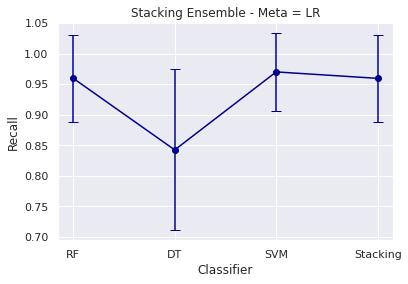

In [50]:
plt.figure()
(_, lr_meta, _) = plt.errorbar(range(4), recall_mean, yerr=recall_std, c='DARKblue', fmt='-o', capsize=5)
for l_met in lr_meta:
    l_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'DT', 'SVM', 'Stacking'])        
plt.ylabel('Recall'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = LR');
plt.show()

In [51]:
#Second try is with same classifiers but this time meta classifier is decision tree
stack=StackingClassifier(classifiers=[rfc,lr,svm],meta_classifier=dtc)
cl_labels=['Random Forest','Logistic Regression','Support Vector Machine','Stacking Classifier']
classify=[rfc,lr,svm,stack]
stack_mean = []
stack_std = []
precision_mean = []
precision_std=[]
recall_mean=[]
recall_std=[]
for clf, name in zip(classify, cl_labels):
        
    accuracy_score = cross_val_score(clf, train_x, train_y, cv=5, scoring='accuracy')
    prec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='precision')
    rec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='recall')
    
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(accuracy_score.mean(), accuracy_score.std(), name))
    print ("Precision: %.2f (+/- %.2f) [%s]" %(prec.mean(), prec.std(), name))
    print ("Recall: %.2f (+/- %.2f) [%s]" %(rec.mean(), rec.std(), name))

    stack_mean.append(accuracy_score.mean())
    stack_std.append(accuracy_score.std())
    precision_mean.append(prec.mean())
    precision_std.append(prec.std())
    recall_mean.append(rec.mean())
    recall_std.append(rec.std())
    clf.fit(train_x, train_y)


Accuracy: 0.90 (+/- 0.06) [Random Forest]
Precision: 0.90 (+/- 0.09) [Random Forest]
Recall: 0.96 (+/- 0.07) [Random Forest]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.86 (+/- 0.08) [Logistic Regression]
Precision: 0.88 (+/- 0.11) [Logistic Regression]
Recall: 0.96 (+/- 0.05) [Logistic Regression]
Accuracy: 0.76 (+/- 0.05) [Support Vector Machine]
Precision: 0.80 (+/- 0.11) [Support Vector Machine]
Recall: 0.97 (+/- 0.06) [Support Vector Machine]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.90 (+/- 0.06) [Stacking Classifier]
Precision: 0.90 (+/- 0.09) [Stacking Classifier]
Recall: 0.96 (+/- 0.07) [Stacking Classifier]


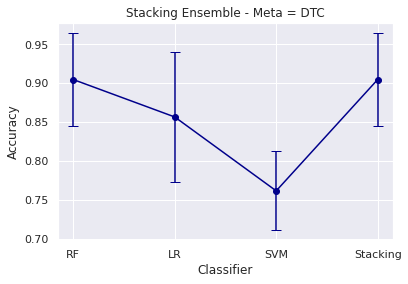

In [52]:
plt.figure()
(_, dtc_meta, _) = plt.errorbar(range(4), stack_mean, yerr=stack_std, c='DARKblue', fmt='-o', capsize=5)
for d_met in dtc_meta:
    d_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'LR', 'SVM', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = DTC');
plt.show()

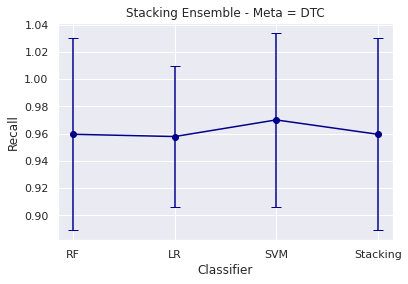

In [53]:
plt.figure()
(_, dtc_meta, _) = plt.errorbar(range(4), recall_mean, yerr=recall_std, c='DARKblue', fmt='-o', capsize=5)
for d_met in dtc_meta:
    d_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'LR', 'SVM', 'Stacking'])        
plt.ylabel('Recall'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = DTC');
plt.show()

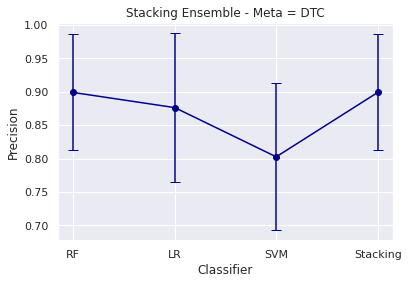

In [54]:
plt.figure()
(_, dtc_meta, _) = plt.errorbar(range(4), precision_mean, yerr=precision_std, c='DARKblue', fmt='-o', capsize=5)
for d_met in dtc_meta:
    d_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'LR', 'SVM', 'Stacking'])        
plt.ylabel('Precision'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = DTC');
plt.show()

In [55]:
#Third try with same classifiers, meta classifier is support vector machine
stack=StackingClassifier(classifiers=[rfc,lr,dtc],meta_classifier=svm)
cl_labels=['Random Forest','Logistic Regression','Decision Tree','Stacking Classifier']
classify=[rfc,lr,dtc,stack]
stack_mean = []
stack_std = []
precision_mean = []
precision_std=[]
recall_mean=[]
recall_std=[]
for clf, name in zip(classify, cl_labels):
        
    accuracy_score = cross_val_score(clf, train_x, train_y, cv=5, scoring='accuracy')
    prec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='precision')
    rec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='recall')
    
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(accuracy_score.mean(), accuracy_score.std(), name))
    print ("Precision: %.2f (+/- %.2f) [%s]" %(prec.mean(), prec.std(), name))
    print ("Recall: %.2f (+/- %.2f) [%s]" %(rec.mean(), rec.std(), name))

    stack_mean.append(accuracy_score.mean())
    stack_std.append(accuracy_score.std())
    precision_mean.append(prec.mean())
    precision_std.append(prec.std())
    recall_mean.append(rec.mean())
    recall_std.append(rec.std())
    clf.fit(train_x, train_y)

Accuracy: 0.90 (+/- 0.06) [Random Forest]
Precision: 0.90 (+/- 0.09) [Random Forest]
Recall: 0.96 (+/- 0.07) [Random Forest]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.86 (+/- 0.08) [Logistic Regression]
Precision: 0.88 (+/- 0.11) [Logistic Regression]
Recall: 0.96 (+/- 0.05) [Logistic Regression]
Accuracy: 0.76 (+/- 0.08) [Decision Tree]
Precision: 0.88 (+/- 0.13) [Decision Tree]
Recall: 0.84 (+/- 0.13) [Decision Tree]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.90 (+/- 0.06) [Stacking Classifier]
Precision: 0.90 (+/- 0.09) [Stacking Classifier]
Recall: 0.96 (+/- 0.07) [Stacking Classifier]


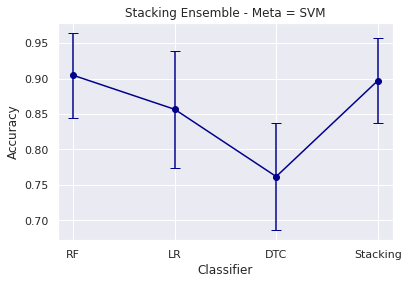

In [56]:
plt.figure()
(_, svm_meta, _) = plt.errorbar(range(4), stack_mean, yerr=stack_std, c='DARKblue', fmt='-o', capsize=5)
for s_met in svm_meta:
    s_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'LR', 'DTC', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = SVM');
plt.show()

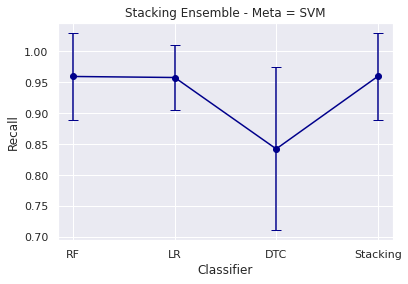

In [57]:
plt.figure()
(_, svm_meta, _) = plt.errorbar(range(4), recall_mean, yerr=recall_std, c='DARKblue', fmt='-o', capsize=5)
for s_met in svm_meta:
    s_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'LR', 'DTC', 'Stacking'])        
plt.ylabel('Recall'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = SVM');
plt.show()

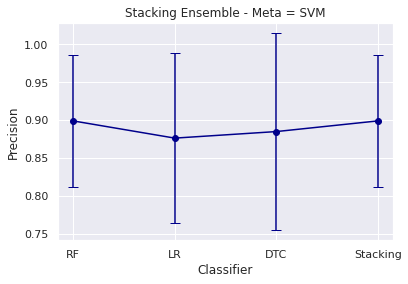

In [58]:
plt.figure()
(_, svm_meta, _) = plt.errorbar(range(4), precision_mean, yerr=precision_std, c='DARKblue', fmt='-o', capsize=5)
for s_met in svm_meta:
    s_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['RF', 'LR', 'DTC', 'Stacking'])        
plt.ylabel('Precision'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = SVM');
plt.show()

In [59]:
#Fourth try is with same classifiers, meta classifier is random forest classifier
stack=StackingClassifier(classifiers=[svm,lr,dtc],meta_classifier=rfc)
cl_labels=['Support Vector Machine','Logistic Regression','Decision Tree','Stacking Classifier']
classify=[svm,lr,dtc,stack]
stack_mean = []
stack_std = []
precision_mean = []
precision_std=[]
recall_mean=[]
recall_std=[]
for clf, name in zip(classify, cl_labels):
        
    accuracy_score = cross_val_score(clf, train_x, train_y, cv=5, scoring='accuracy')
    prec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='precision')
    rec=cross_val_score(clf, train_x, train_y, cv=k_fold_val, scoring='recall')
    
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(accuracy_score.mean(), accuracy_score.std(), name))
    print ("Precision: %.2f (+/- %.2f) [%s]" %(prec.mean(), prec.std(), name))
    print ("Recall: %.2f (+/- %.2f) [%s]" %(rec.mean(), rec.std(), name))

    stack_mean.append(accuracy_score.mean())
    stack_std.append(accuracy_score.std())
    precision_mean.append(prec.mean())
    precision_std.append(prec.std())
    recall_mean.append(rec.mean())
    recall_std.append(rec.std())
    clf.fit(train_x, train_y)

Accuracy: 0.76 (+/- 0.05) [Support Vector Machine]
Precision: 0.80 (+/- 0.11) [Support Vector Machine]
Recall: 0.97 (+/- 0.06) [Support Vector Machine]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.86 (+/- 0.08) [Logistic Regression]
Precision: 0.88 (+/- 0.11) [Logistic Regression]
Recall: 0.96 (+/- 0.05) [Logistic Regression]
Accuracy: 0.76 (+/- 0.08) [Decision Tree]
Precision: 0.88 (+/- 0.13) [Decision Tree]
Recall: 0.84 (+/- 0.13) [Decision Tree]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.85 (+/- 0.07) [Stacking Classifier]
Precision: 0.87 (+/- 0.12) [Stacking Classifier]
Recall: 0.94 (+/- 0.06) [Stacking Classifier]


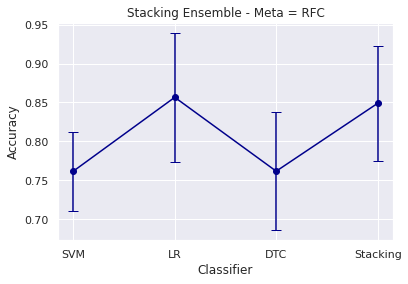

In [60]:
plt.figure()
(_, rfc_meta, _) = plt.errorbar(range(4), stack_mean, yerr=stack_std, c='DARKblue', fmt='-o', capsize=5)
for r_met in rfc_meta:
    r_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['SVM', 'LR', 'DTC', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = RFC');
plt.show()
#This is the worst result. Random forest classfier did not work well as a meta classifier.

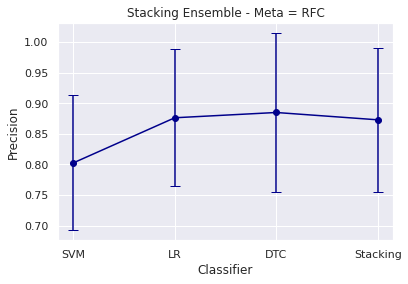

In [61]:
plt.figure()
(_, rfc_meta, _) = plt.errorbar(range(4), precision_mean, yerr=precision_std, c='DARKblue', fmt='-o', capsize=5)
for r_met in rfc_meta:
    r_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['SVM', 'LR', 'DTC', 'Stacking'])        
plt.ylabel('Precision'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = RFC');
plt.show()

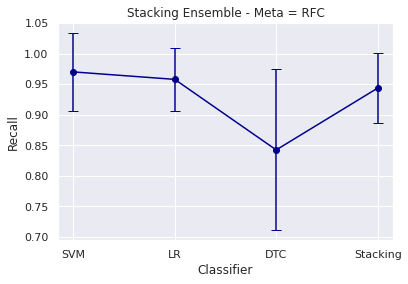

In [62]:
plt.figure()
(_, rfc_meta, _) = plt.errorbar(range(4), recall_mean, yerr=recall_std, c='DARKblue', fmt='-o', capsize=5)
for r_met in rfc_meta:
    r_met.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['SVM', 'LR', 'DTC', 'Stacking'])        
plt.ylabel('Recall'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble - Meta = RFC');
plt.show()

This is a classification problem, because of that the most important metrics in the problem are precision and recall. According to those metrics the best choices for our problem are Support Vector Machine -in part 1 and part2- and Ada Boost Classifier in part 3. But we tried XGBoost Classifier for prediction part. After prediction XGBoost classifier gave 97% accuracy score which is very good. According to XGBoost Ensemble graph, we should not use XGBoost. By the way Stacking Classifier results are close or same with SVM.

# Prediction

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
ss=StandardScaler().fit(train_x)
ss_x=ss.transform(train_x)
model_ada=AdaBoostClassifier(n_estimators=100)
model_ada.fit(ss_x,train_y)


ss_x_test=ss.transform(test_x)
y_pred=model_ada.predict(ss_x_test)
y_hat=model_ada.predict(ss_x)

In [64]:

accuracy_mean=accuracy_score(train_y,y_hat)
accuracy_matric=confusion_matrix(train_y,y_hat)
print("Training Set")
print("Accuracy:",accuracy_mean)
print(accuracy_matric)

accuracy_mean=accuracy_score(test_y,y_pred)
accuracy_matric=confusion_matrix(test_y,y_pred)
print("Test Set")
print("Accuracy:",accuracy_mean)
print(accuracy_matric)

Training Set
Accuracy: 1.0
[[31  0]
 [ 0 95]]
Test Set
Accuracy: 0.9130434782608695
[[12  5]
 [ 1 51]]


In [65]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.91      0.98      0.94        52

    accuracy                           0.91        69
   macro avg       0.92      0.84      0.87        69
weighted avg       0.91      0.91      0.91        69



In [66]:
for i in range(len(test_y)):
        
        print(str(i)+"."+"Predicted value: "+str(y_pred[i])+" Original value: "+ str(dataset['status'][i]))

0.Predicted value: 1 Original value: 1
1.Predicted value: 1 Original value: 1
2.Predicted value: 1 Original value: 1
3.Predicted value: 1 Original value: 1
4.Predicted value: 1 Original value: 1
5.Predicted value: 1 Original value: 1
6.Predicted value: 1 Original value: 1
7.Predicted value: 1 Original value: 1
8.Predicted value: 1 Original value: 1
9.Predicted value: 1 Original value: 1
10.Predicted value: 1 Original value: 1
11.Predicted value: 1 Original value: 1
12.Predicted value: 1 Original value: 1
13.Predicted value: 1 Original value: 1
14.Predicted value: 1 Original value: 1
15.Predicted value: 1 Original value: 1
16.Predicted value: 1 Original value: 1
17.Predicted value: 0 Original value: 1
18.Predicted value: 0 Original value: 1
19.Predicted value: 1 Original value: 1
20.Predicted value: 1 Original value: 1
21.Predicted value: 1 Original value: 1
22.Predicted value: 1 Original value: 1
23.Predicted value: 0 Original value: 1
24.Predicted value: 1 Original value: 1
25.Predict

## XGBoost Classifier

In [67]:
scaler=StandardScaler().fit(train_x)
scaler_x=scaler.transform(train_x)
model_xgb=XGBClassifier(n_estimators=100)
model_xgb.fit(scaler_x,train_y)


scaled_x_test=scaler.transform(test_x)
y_pred=model_xgb.predict(scaled_x_test)
y_prediction_train=model_xgb.predict(scaler_x)

In [68]:

accuracy_mean=accuracy_score(train_y,y_prediction_train)
accuracy_matric=confusion_matrix(train_y,y_prediction_train)
print("Training Set")
print("Accuracy:",accuracy_mean)
print(accuracy_matric)

accuracy_mean=accuracy_score(test_y,y_pred)
accuracy_matric=confusion_matrix(test_y,y_pred)
print("Test Set")
print("Accuracy:",accuracy_mean)
print(accuracy_matric)

Training Set
Accuracy: 1.0
[[31  0]
 [ 0 95]]
Test Set
Accuracy: 0.9710144927536232
[[15  2]
 [ 0 52]]


In [69]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.96      1.00      0.98        52

    accuracy                           0.97        69
   macro avg       0.98      0.94      0.96        69
weighted avg       0.97      0.97      0.97        69



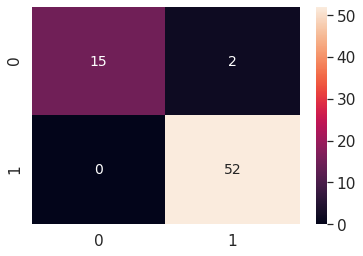

In [70]:
con_arr=[[15,2],
         [0,52]] #This is taken from testing accuracy matrix
df_con_arr = pd.DataFrame(con_arr, range(2), range(2))
sb.set(font_scale=1.4) # for label size
sb.heatmap(df_con_arr, annot=True, annot_kws={"size": 14}) # font size
plt.show()
#For this visualization, plot_confusion_matrix from scikit-learn also can be used.